In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('bank-additional.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


<AxesSubplot:xlabel='age'>

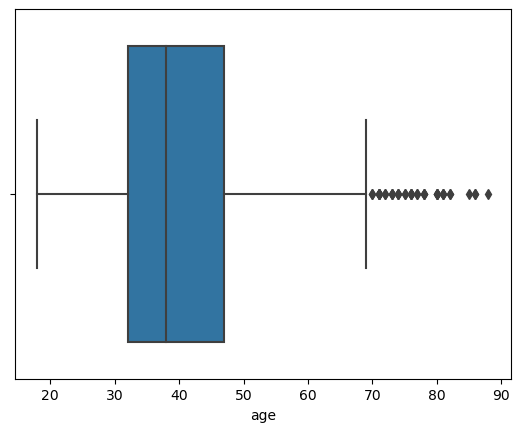

In [3]:
sns.boxplot(x = df['age'])

<AxesSubplot:xlabel='duration'>

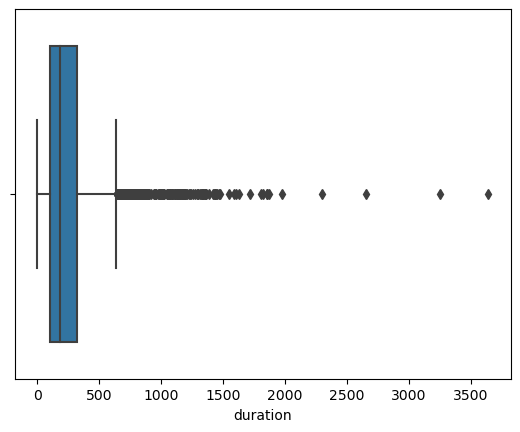

In [4]:
sns.boxplot(x = df['duration'])

<AxesSubplot:xlabel='euribor3m'>

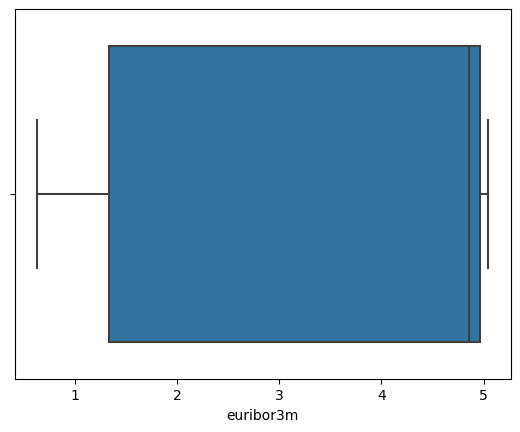

In [5]:
sns.boxplot(x = df['euribor3m'])

<AxesSubplot:xlabel='pdays'>

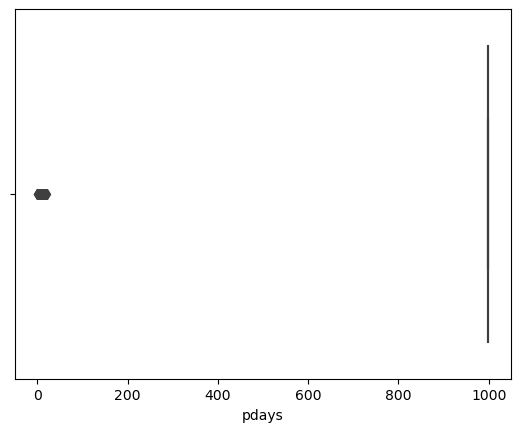

In [6]:
sns.boxplot(x = df['pdays'])

In [7]:
numerical_cols = ['duration', 'pdays','age',]
df[numerical_cols]=np.sqrt(df[numerical_cols])
df[numerical_cols]=np.log(df[numerical_cols] + 1)

In [8]:
duplicates = df.duplicated().sum()
print(f'Number of duplicate rows = {duplicates}')

Number of duplicate rows = 0


In [9]:
df = df.replace('unknown', np.nan)

In [10]:
missing = df.isnull().sum()
print(missing)

age                 0
job                39
marital            11
education         167
default           803
housing           105
loan              105
contact             0
month               0
day_of_week         0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                   0
dtype: int64


In [11]:
df['job'].fillna(df['job'].mode()[0], inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)

In [12]:
df['marital'].fillna(df['marital'].mode()[0], inplace=True)

In [13]:
df['default'].fillna(df['default'].mode()[0], inplace=True)
df['housing'].fillna(df['housing'].mode()[0], inplace=True)
df['loan'].fillna(df['loan'].mode()[0], inplace=True)

In [14]:
missing = df.isnull().sum()
print(missing)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [15]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
for column in categorical_cols:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in job: ['blue-collar' 'services' 'admin.' 'entrepreneur' 'self-employed'
 'technician' 'management' 'student' 'retired' 'housemaid' 'unemployed']
Unique values in marital: ['married' 'single' 'divorced']
Unique values in education: ['basic.9y' 'high.school' 'university.degree' 'professional.course'
 'basic.6y' 'basic.4y' 'illiterate']
Unique values in default: ['no' 'yes']
Unique values in housing: ['yes' 'no']
Unique values in loan: ['no' 'yes']
Unique values in contact: ['cellular' 'telephone']
Unique values in month: ['may' 'jun' 'nov' 'sep' 'jul' 'aug' 'mar' 'oct' 'apr' 'dec']
Unique values in day_of_week: ['fri' 'wed' 'mon' 'thu' 'tue']
Unique values in poutcome: ['nonexistent' 'failure' 'success']


In [16]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [17]:
from sklearn.preprocessing import LabelEncoder

# Perform label encoding on categorical columns
label_encoder = LabelEncoder()
for column in categorical_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [18]:
from sklearn.preprocessing import StandardScaler

# Perform standardization on numerical columns
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.027395,1,1,2,0,1,0,0,6,0,...,2,0.199916,0,1,-1.8,92.893,-46.2,1.313,5099.1,no
1,0.006061,7,2,3,0,0,0,1,6,0,...,4,0.199916,0,1,1.1,93.994,-36.4,4.855,5191.0,no
2,-1.733466,7,1,3,0,1,0,1,4,4,...,1,0.199916,0,1,1.4,94.465,-41.8,4.962,5228.1,no
3,-0.097129,7,1,2,0,1,0,1,4,0,...,3,0.199916,0,1,1.4,94.465,-41.8,4.959,5228.1,no
4,0.752628,0,1,6,0,1,0,0,7,1,...,1,0.199916,0,1,-0.1,93.200,-42.0,4.191,5195.8,no


In [20]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.027395,1,1,2,0,1,0,0,6,0,...,2,0.199916,0,1,-1.8,92.893,-46.2,1.313,5099.1,no
1,0.006061,7,2,3,0,0,0,1,6,0,...,4,0.199916,0,1,1.1,93.994,-36.4,4.855,5191.0,no
2,-1.733466,7,1,3,0,1,0,1,4,4,...,1,0.199916,0,1,1.4,94.465,-41.8,4.962,5228.1,no
3,-0.097129,7,1,2,0,1,0,1,4,0,...,3,0.199916,0,1,1.4,94.465,-41.8,4.959,5228.1,no
4,0.752628,0,1,6,0,1,0,0,7,1,...,1,0.199916,0,1,-0.1,93.200,-42.0,4.191,5195.8,no


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

In [22]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['y'] = label_encoder.fit_transform(df['y'])

In [23]:
X = df.drop('y', axis=1)
y = df['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_jobs=-1, max_depth=10, min_samples_split=4),
    "XGBoost": XGBClassifier(eval_metric='error', n_jobs=-1, n_estimators=470, max_depth=9, learning_rate=0.02)
}

In [25]:
def evaluate_model(name, model, features, labels):
    model.fit(features, labels)
    predictions = model.predict(features)
    accuracy = accuracy_score(labels, predictions)
    f1 = f1_score(labels, predictions)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy}")
    print(f"F1 Score: {f1}")

In [26]:
for name, model in models.items():
    evaluate_model(name, model, X_train, y_train) 

Model: Logistic Regression
Accuracy: 0.9091224419007978
F1 Score: 0.4801587301587302
Model: Random Forest
Accuracy: 0.9774540409295872
F1 Score: 0.8881239242685026
Model: XGBoost
Accuracy: 0.9979188345473465
F1 Score: 0.9905362776025236


In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest, f_classif

In [28]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,-1.027395,1,1,2,0,1,0,0,6,0,...,2,0.199916,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,0.006061,7,2,3,0,0,0,1,6,0,...,4,0.199916,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,-1.733466,7,1,3,0,1,0,1,4,4,...,1,0.199916,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,-0.097129,7,1,2,0,1,0,1,4,0,...,3,0.199916,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,0.752628,0,1,6,0,1,0,0,7,1,...,1,0.199916,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [29]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_cols = ['job', 'marital', 'education','default', 'housing', 'loan', 'contact', 'poutcome','default', 'month', 'day_of_week']

In [30]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
passthrough_cols = ['duration']

In [31]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols),
    ])

In [32]:
feature_selector = SelectKBest(score_func=f_classif, k=10)

In [33]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('selector', feature_selector),
    ('model', XGBClassifier())  # Replace with your best performing model (XGBoost)
])

In [34]:
pipeline.fit(X_train, y_train)

[19:04:43] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'poutcome', 'default',
       

In [35]:
y_pred = pipeline.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      1105
           1       0.53      0.52      0.53       131

    accuracy                           0.90      1236
   macro avg       0.74      0.73      0.73      1236
weighted avg       0.90      0.90      0.90      1236



In [37]:
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', XGBClassifier(eval_metric='error'))])

In [38]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [5, 10, 15],
}

In [39]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'duration',
                                                                          'campaign',
                                                                          'pdays',
                                                                          'previous',
                                                                          'emp.var.rate',
                                                                          'cons.price.idx',
                                                                          'cons.conf.idx',
                                                           

In [40]:
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'classifier__max_depth': 15, 'classifier__n_estimators': 200}
Best Score:  0.9164109137300211


In [41]:
best_grid = grid_search.best_estimator_
grid_accuracy = best_grid.score(X_test, y_test)
grid_f1 = f1_score(y_test, best_grid.predict(X_test))
print("Test F1 Score: ", grid_f1)
print("Test Accuracy: ", grid_accuracy)

Test F1 Score:  0.5333333333333333
Test Accuracy:  0.9037216828478964


In [42]:
y_pred = best_grid.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1_accuracy = f1_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1_accuracy}")

Accuracy: 0.9037216828478964
F1 Score: 0.5333333333333333


In [43]:
model=best_grid
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'duration',
                                                   'campaign', 'pdays',
                                                   'previous', 'emp.var.rate',
                                                   'cons.price.idx',
                                                   'cons.conf.idx', 'euribor3m',
                                                   'nr.employed']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'poutcome', 'default',
       

In [44]:
import pickle
filename='bank_marketing_predictor2.sav'
pickle.dump(model, open(filename,'wb'))